<a href="https://colab.research.google.com/github/LuixCabral/Machine-Learning/blob/main/DecisionTree_Luis_Victor_Cabral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TREINAMENTO COM OS DADOS ORIGINAIS DO DATASET


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('day.csv')

print(df)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

Valor do Erro Quadrático Médio (MSE): 0.25986652349862116
Valor do Erro Absoluto Médio (MAE): 0.33022120991594517
Coeficiente de Determinação (R²): 0.7571275515761973


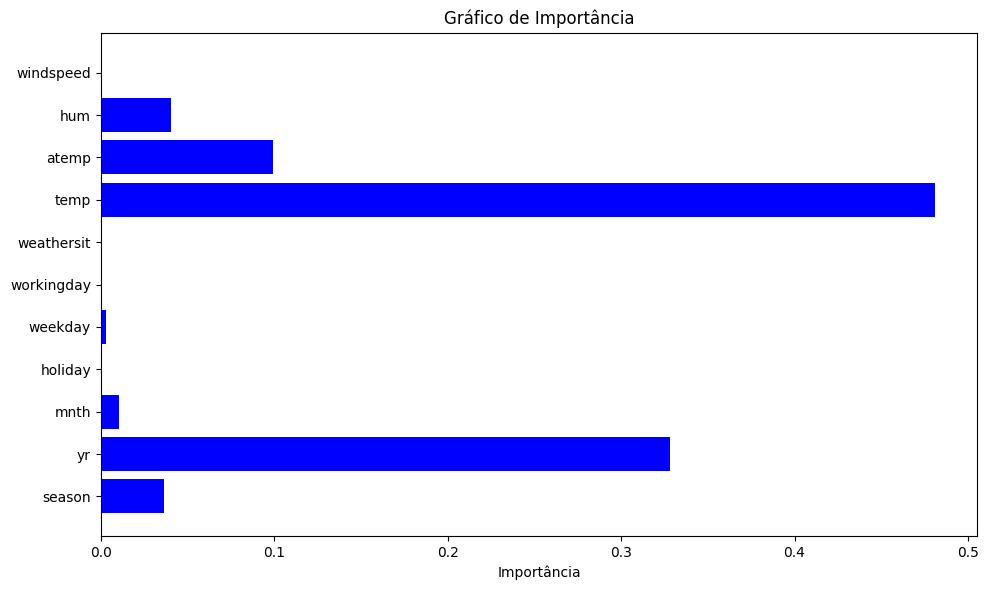

pré poda


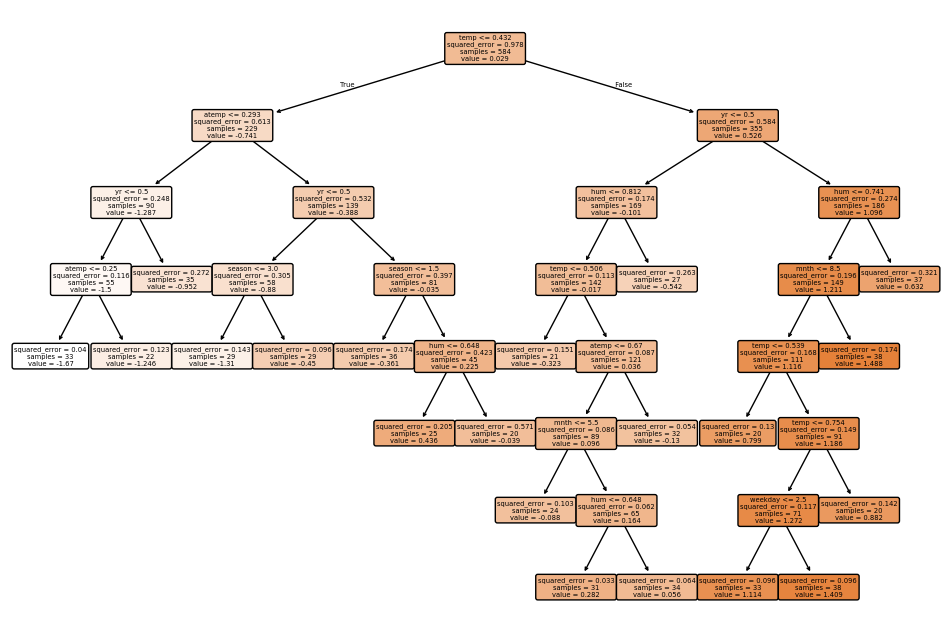

pós poda


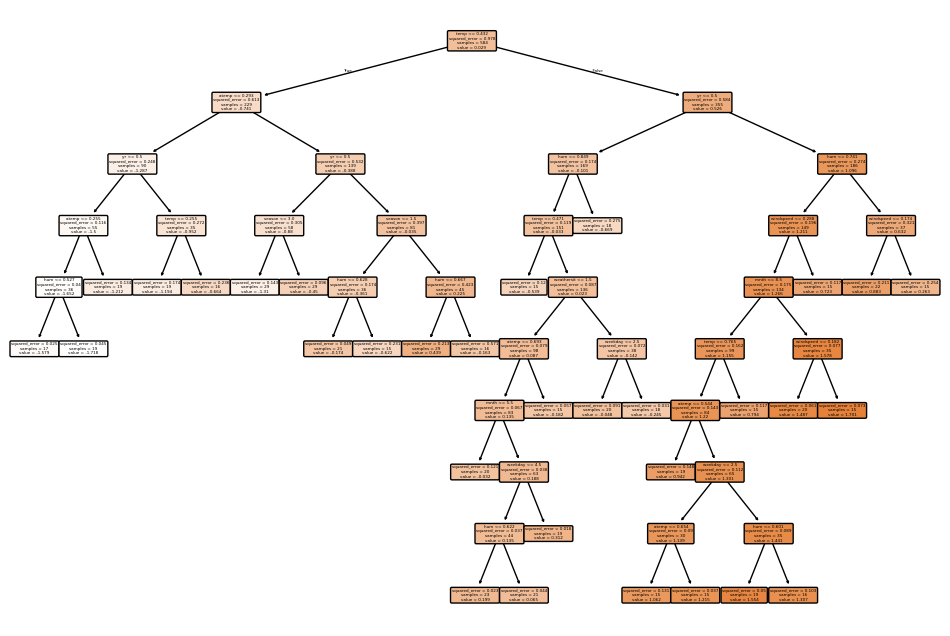

Valor do Erro Quadrático Médio (MSE) com Poda: 0.22580292094266077
Valor do Erro Absoluto Médio (MAE) com Poda: 0.3099148293408922
Coeficiente de Determinação (R²): 0.7889635512406377


In [ ]:
df = pd.read_csv('day.csv')

x = df.drop(columns=['dteday', 'instant', 'cnt', 'casual', 'registered'])
y = df['cnt']

# Padronizar a variável alvo
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

#80/20
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=10,min_samples_leaf=20, random_state=42)
model.fit(X_train, y_train_scaled)


y_pred_scaled = model.predict(X_test)

mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print("Valor do Erro Quadrático Médio (MSE):", mse)

mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print("Valor do Erro Absoluto Médio (MAE):", mae)


r2 = r2_score(y_test_scaled, y_pred_scaled)
print("Coeficiente de Determinação (R²):", r2)

importances = model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='blue')
plt.xlabel('Importância')
plt.title('Gráfico de Importância')
plt.tight_layout()
plt.show()
print("============================")
print("pré poda")

plt.figure(figsize=(12, 8))
plt.title('Àrvore sem Poda')
plot_tree(model, filled=True, feature_names=x.columns, rounded=True)
plt.show()
print("============================")
print("pós poda")


model_with_pruning = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=15, random_state=42)
model_with_pruning.fit(X_train, y_train_scaled)

plt.figure(figsize=(12,8))
plt.title("Árvore de Decisão - Com Poda)")
plot_tree(model_with_pruning, filled=True, feature_names=x.columns, rounded=True)
plt.show()

y_pred_scaled_pruned = model_with_pruning.predict(X_test)
mse_pruned = mean_squared_error(y_test_scaled, y_pred_scaled_pruned)
print("Valor do Erro Quadrático Médio (MSE) com Poda:", mse_pruned)
mae_pruned = mean_absolute_error(y_test_scaled, y_pred_scaled_pruned)
print("Valor do Erro Absoluto Médio (MAE) com Poda:", mae_pruned)

r2 = r2_score(y_test_scaled, y_pred_scaled_pruned)
print("Coeficiente de Determinação (R²):", r2)

Nesta seção do Colab, realizamos uma análise sazonal da demanda por bicicletas compartilhadas, com o objetivo de entender como diferentes estações do ano influenciam o uso das bicicletas. O modelo de árvore de decisão, treinado previamente, foi utilizado para prever a demanda por estação do ano (Primavera, Verão, Outono e Inverno).

Objetivos da Análise Sazonal
A análise sazonal visa identificar padrões de uso ao longo das estações para que as empresas de compartilhamento de bicicletas possam ajustar suas operações e recursos de acordo com as variações sazonais. Ao compreender a influência do clima e da estação do ano sobre a demanda, é possível:

Otimizar a alocação de bicicletas: Mais bicicletas podem ser disponibilizadas nas estações de alta demanda, como o Verão, enquanto menos recursos podem ser alocados nas estações de baixa demanda, como o Inverno.
Planejar campanhas de marketing e ajustar preços: Campanhas promocionais podem ser implementadas em períodos de menor demanda para incentivar o uso, enquanto períodos de alta demanda podem ser aproveitados para aumentar a receita.
Suporte para expansão estratégica: A análise sazonal indica os períodos de maior uso, ajudando a empresa a decidir os melhores momentos para expandir o serviço para novas áreas.
Passos da Análise Sazonal no Colab
Classificação por Estação: Os dados foram organizados para que cada previsão de demanda seja associada à estação correspondente (Primavera, Verão, Outono e Inverno).
Visualização dos Resultados: Utilizamos um gráfico de barras para visualizar a distribuição da demanda prevista em cada estação, o que nos permite observar como a demanda varia ao longo do ano.
Interpretação dos Padrões Sazonais: Com base nos resultados, identificamos as estações com maior e menor demanda, confirmando que o modelo é capaz de captar os padrões sazonais que influenciam o uso de bicicletas.
Resultados e Insights
O histograma gerado mostra a frequência da demanda por bicicletas em diferentes faixas de uso para cada estação. Esses resultados confirmam que as condições climáticas e o período do ano impactam significativamente a demanda, validando a aplicabilidade do modelo para o planejamento sazonal. Esse conhecimento oferece suporte valioso para decisões operacionais e estratégicas, permitindo uma gestão mais eficiente do sistema de bicicletas compartilhadas ao longo do ano

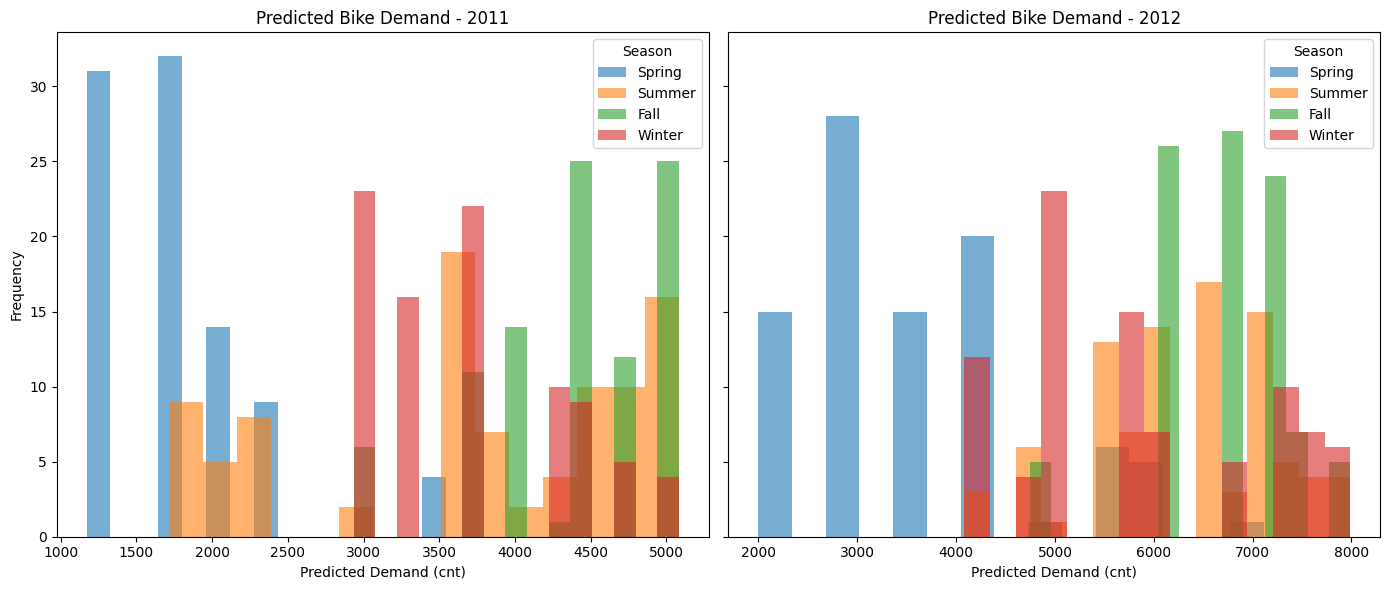

In [ ]:


# Carregar o conjunto de dados original
df = pd.read_csv('day.csv')

# Separar as variáveis independentes e dependente
X = df.drop(columns=['dteday', 'instant', 'cnt', 'casual', 'registered'])
y = df['cnt']

# Padronizar as variáveis
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

scaler_y = StandardScaler().fit(y.values.reshape(-1, 1))
y_scaled = scaler_y.transform(y.values.reshape(-1, 1))

# Treinar o modelo com poda
model = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=15, random_state=42)
model.fit(X_scaled, y_scaled)

# Fazer previsões para todo o conjunto de dados
y_pred_scaled_all = model.predict(X_scaled)
y_pred_all = scaler_y.inverse_transform(y_pred_scaled_all.reshape(-1, 1))

# Adicionar previsões e ano ao DataFrame original
df['Predicted_Demand'] = y_pred_all
df['Year'] = df['yr'].map({0: '2011', 1: '2012'})  # Mapear o ano
df['Season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Configurações do layout dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para 2011
for season in df['Season'].unique():
    subset = df[(df['Year'] == '2011') & (df['Season'] == season)]
    axes[0].hist(subset['Predicted_Demand'], bins=15, alpha=0.6, label=season)

axes[0].set_title('Predicted Bike Demand - 2011')
axes[0].set_xlabel('Predicted Demand (cnt)')
axes[0].set_ylabel('Frequency')
axes[0].legend(title="Season")

# Gráfico para 2012
for season in df['Season'].unique():
    subset = df[(df['Year'] == '2012') & (df['Season'] == season)]
    axes[1].hist(subset['Predicted_Demand'], bins=15, alpha=0.6, label=season)

axes[1].set_title('Predicted Bike Demand - 2012')
axes[1].set_xlabel('Predicted Demand (cnt)')
axes[1].legend(title="Season")

plt.tight_layout()
plt.show()


Estatísticas de Demanda Prevista no Verão de 2011:
count      92.000000
mean     3716.236645
std      1123.556944
min      1716.000000
25%      2933.866667
50%      3743.826087
75%      4755.259259
max      5082.275862
Name: Predicted_Demand, dtype: float64

Estatísticas de Demanda Prevista no Verão de 2012:
count      92.000000
mean     6267.261134
std       923.186901
min      4081.133333
25%      5600.247608
50%      6457.411765
75%      7118.812500
max      7989.066667
Name: Predicted_Demand, dtype: float64


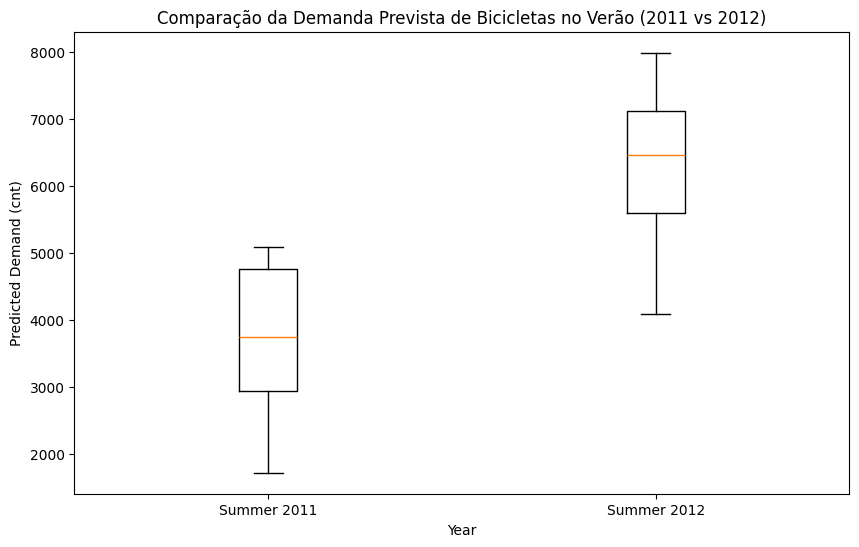

In [ ]:

# Carregar o conjunto de dados original
df = pd.read_csv('day.csv')

# Separar as variáveis independentes e dependente
X = df.drop(columns=['dteday', 'instant', 'cnt', 'casual', 'registered'])
y = df['cnt']

# Padronizar as variáveis
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

scaler_y = StandardScaler().fit(y.values.reshape(-1, 1))
y_scaled = scaler_y.transform(y.values.reshape(-1, 1))

# Treinar o modelo com poda
model = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=15, random_state=42)
model.fit(X_scaled, y_scaled)

# Fazer previsões para todo o conjunto de dados
y_pred_scaled_all = model.predict(X_scaled)
y_pred_all = scaler_y.inverse_transform(y_pred_scaled_all.reshape(-1, 1))

# Adicionar previsões e ano ao DataFrame original
df['Predicted_Demand'] = y_pred_all
df['Year'] = df['yr'].map({0: '2011', 1: '2012'})  # Mapear o ano
df['Season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Filtrar dados de verão para 2011 e 2012
summer_2011 = df[(df['Year'] == '2011') & (df['Season'] == 'Summer')]
summer_2012 = df[(df['Year'] == '2012') & (df['Season'] == 'Summer')]

# Estatísticas descritivas para comparação
print("Estatísticas de Demanda Prevista no Verão de 2011:")
print(summer_2011['Predicted_Demand'].describe())
print("\nEstatísticas de Demanda Prevista no Verão de 2012:")
print(summer_2012['Predicted_Demand'].describe())

# Plotar comparação com boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([summer_2011['Predicted_Demand'], summer_2012['Predicted_Demand']], labels=['Summer 2011', 'Summer 2012'])
plt.title('Comparação da Demanda Prevista de Bicicletas no Verão (2011 vs 2012)')
plt.ylabel('Predicted Demand (cnt)')
plt.xlabel('Year')
plt.show()
